In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
import os

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,                  
    rotation_range=40,               
    width_shift_range=0.2,           
    height_shift_range=0.2,          
    shear_range=0.2,                 
    zoom_range=0.2,                  
    horizontal_flip=True,            
    fill_mode='nearest',             
)

In [29]:
train_generator_original = train_datagen.flow_from_directory(
    os.path.join("..","..","datasets","PH2_estruturado","treino"),                        
    target_size=(500, 500),          
    batch_size=32,          
    class_mode='binary'     
)
train_generator_contornado = train_datagen.flow_from_directory(
    os.path.join("..","..","datasets","PH2Contornado_estruturado","treino"),                        
    target_size=(500, 500),          
    batch_size=32,          
    class_mode='binary'     
)

Found 160 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [56]:
val_generator_original = train_datagen.flow_from_directory(
    os.path.join("..","..","datasets","PH2_estruturado","validacao"),                        
    target_size=(500, 500),          
    batch_size=32,          
    class_mode='binary'     
)
val_generator_contornado = train_datagen.flow_from_directory(
    os.path.join("..","..","datasets","PH2Contornado_estruturado","validacao"),                        
    target_size=(500, 500),          
    batch_size=32,          
    class_mode='binary'     
)

Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [60]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),               
    Dense(1, activation='sigmoid')  
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC'])

In [61]:
history_contornado = model.fit(
    train_generator_contornado, 
    steps_per_epoch=5,  
    epochs=12,            
    validation_data=val_generator_contornado,  
    validation_steps=2  
)

Epoch 1/12
5/5 [==============================] - 22s 4s/step - loss: 1.8235 - accuracy: 0.6313 - auc: 0.6121 - val_loss: 0.4668 - val_accuracy: 0.8000 - val_auc: 0.7168
Epoch 2/12
5/5 [==============================] - 20s 4s/step - loss: 0.4413 - accuracy: 0.8125 - auc: 0.7325 - val_loss: 0.3937 - val_accuracy: 0.7750 - val_auc: 0.8574
Epoch 3/12
5/5 [==============================] - 19s 4s/step - loss: 0.3407 - accuracy: 0.8375 - auc: 0.9030 - val_loss: 0.4021 - val_accuracy: 0.8000 - val_auc: 0.7949
Epoch 4/12
5/5 [==============================] - 19s 4s/step - loss: 0.2878 - accuracy: 0.9000 - auc: 0.9161 - val_loss: 0.3446 - val_accuracy: 0.8500 - val_auc: 0.8770
Epoch 5/12
5/5 [==============================] - 19s 4s/step - loss: 0.3069 - accuracy: 0.8687 - auc: 0.8962 - val_loss: 0.3793 - val_accuracy: 0.8500 - val_auc: 0.9043
Epoch 6/12
5/5 [==============================] - 19s 4s/step - loss: 0.2423 - accuracy: 0.8938 - auc: 0.9431 - val_loss: 0.3693 - val_accuracy: 0.825

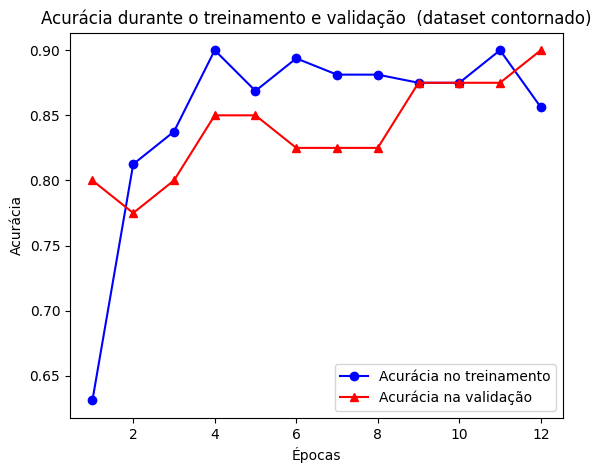

In [92]:
history_dict = history_contornado.history

loss = history_dict['loss'] 

accuracy = history_dict.get('accuracy')
val_accuracy = history_dict.get('val_accuracy') 

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 5))



if accuracy and val_accuracy:
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Acurácia no treinamento')
    plt.plot(epochs, val_accuracy, 'r^-', label='Acurácia na validação')
    plt.title('Acurácia durante o treinamento e validação  (dataset contornado)')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()

plt.show()

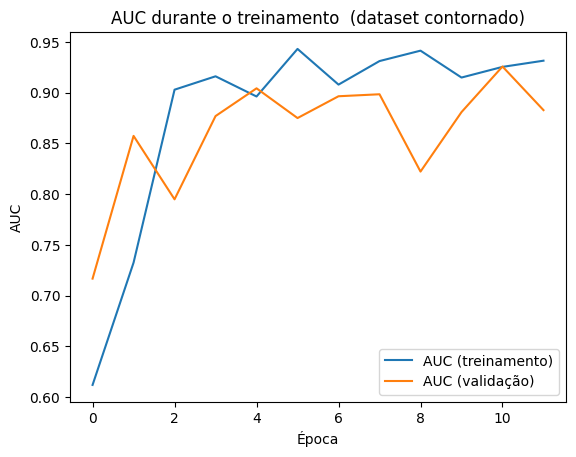

In [93]:
plt.plot(history_contornado.history['auc'], label='AUC (treinamento)')
plt.plot(history_contornado.history['val_auc'], label='AUC (validação)')
plt.title('AUC durante o treinamento  (dataset contornado)')
plt.xlabel('Época')
plt.ylabel('AUC')
plt.legend()
plt.show()

# Salvar modelo

In [83]:
model.save("primeiro_modelo.h5")

In [71]:
best_auc

0.943115234375

In [88]:
history_original = model.fit(
    train_generator_original, 
    steps_per_epoch=5,  
    epochs=12,            
    validation_data=val_generator_original,  
    validation_steps=2  
)

Epoch 1/12
5/5 [==============================] - 21s 4s/step - loss: 0.9443 - accuracy: 0.6812 - auc: 0.6892 - val_loss: 0.7989 - val_accuracy: 0.8000 - val_auc: 0.7305
Epoch 2/12
5/5 [==============================] - 20s 4s/step - loss: 0.5117 - accuracy: 0.8000 - auc: 0.6707 - val_loss: 0.4947 - val_accuracy: 0.8250 - val_auc: 0.8184
Epoch 3/12
5/5 [==============================] - 20s 4s/step - loss: 0.4305 - accuracy: 0.8125 - auc: 0.7908 - val_loss: 0.3644 - val_accuracy: 0.8000 - val_auc: 0.8828
Epoch 4/12
5/5 [==============================] - 20s 4s/step - loss: 0.3197 - accuracy: 0.8375 - auc: 0.9021 - val_loss: 0.4030 - val_accuracy: 0.8250 - val_auc: 0.7695
Epoch 5/12
5/5 [==============================] - 20s 4s/step - loss: 0.3884 - accuracy: 0.8750 - auc: 0.8344 - val_loss: 0.3382 - val_accuracy: 0.8000 - val_auc: 0.8750
Epoch 6/12
5/5 [==============================] - 20s 4s/step - loss: 0.3747 - accuracy: 0.8313 - auc: 0.8512 - val_loss: 0.3631 - val_accuracy: 0.850

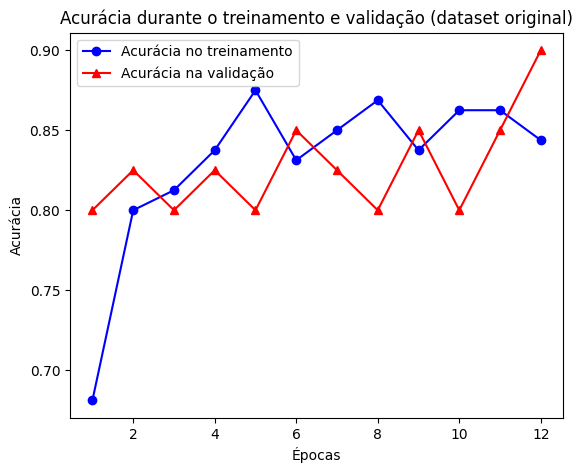

In [94]:
history_dict = history_original.history

loss = history_dict['loss'] 

accuracy = history_dict.get('accuracy')
val_accuracy = history_dict.get('val_accuracy') 

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 5))



if accuracy and val_accuracy:
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'bo-', label='Acurácia no treinamento')
    plt.plot(epochs, val_accuracy, 'r^-', label='Acurácia na validação')
    plt.title('Acurácia durante o treinamento e validação (dataset original)')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()

plt.show()

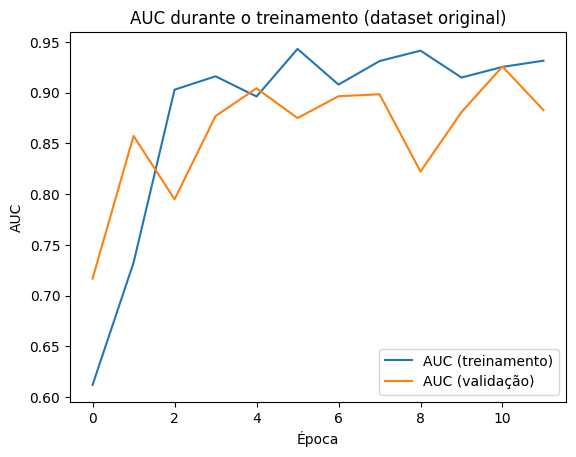

In [95]:
plt.plot(history_contornado.history['auc'], label='AUC (treinamento)')
plt.plot(history_contornado.history['val_auc'], label='AUC (validação)')
plt.title('AUC durante o treinamento (dataset original)')
plt.xlabel('Época')
plt.ylabel('AUC')
plt.legend()
plt.show()